In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [33]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [34]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [35]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [36]:
df=df.drop(['animal name'],axis=1)

In [37]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [39]:
array=df.values

In [40]:
X=array[:,:-1]
Y=array[:,-1]

In [41]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [42]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

## Model Building

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=19)

In [44]:
X.shape,Y.shape

((101, 16), (101,))

In [45]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((80, 16), (21, 16), (80,), (21,))

## Model Training

In [46]:
knn=KNeighborsClassifier(n_neighbors=3)

In [47]:
knn=KNeighborsClassifier(n_neighbors=3)
score=cross_val_score(knn,X_train,Y_train,cv=3)
score.mean()

0.8741690408357075

In [48]:
knn=KNeighborsClassifier(n_neighbors=7)
score=cross_val_score(knn,X_train,Y_train,cv=3)
score.mean()

0.7996201329534663

In [49]:
knn=KNeighborsClassifier(n_neighbors=9)
score=cross_val_score(knn,X_train,Y_train,cv=3)
score.mean()

0.7867996201329533

In [50]:
knn=KNeighborsClassifier(n_neighbors=11)
score=cross_val_score(knn,X_train,Y_train,cv=3)
score.mean()

0.7867996201329533

In [51]:
knn=KNeighborsClassifier(n_neighbors=13)
score=cross_val_score(knn,X_train,Y_train,cv=3)
score.mean()

0.7483380816714149

In [52]:
score=[]
k_range=(i*2+1 for i in range(3,20,2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train , Y_train, cv=3)
    score.append(scores.mean())
    
score

[0.7996201329534663,
 0.7867996201329533,
 0.6989553656220323,
 0.5992402659069326,
 0.5992402659069326,
 0.5365622032288698,
 0.4501424501424502,
 0.4501424501424502,
 0.4501424501424502]

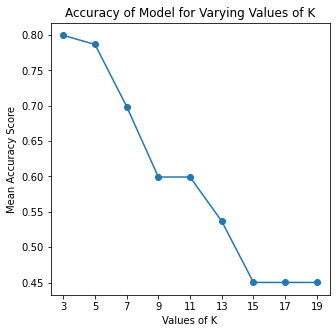

In [53]:
# Plot n values and average accuracy scores
plt.plot(range(3,20,2),score, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(range(3,20,2))
plt.rcParams['figure.figsize'] = (5,5) 

plt.show()

In [54]:
# we will choose k=3 because it is giving us the best cross validation score.

In [55]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
score=cross_val_score(knn,X_train,Y_train)
score.mean()

0.9

In [56]:
print(classification_report(Y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.25      0.50      0.33         2
           4       1.00      1.00      1.00         5
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.81        21
   macro avg       0.61      0.64      0.62        21
weighted avg       0.79      0.81      0.79        21

